**Import libraries**

In [193]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [194]:
import warnings
warnings.filterwarnings('ignore')

**Import dataset**

In [195]:
df=pd.read_csv('/car_evaluation.txt',header=None,sep=',',names=['buying','maint','doors','persons','lug_boot','safety','class'])

In [196]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [198]:
df.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [199]:
col=['buying','maint','doors','persons','lug_boot','safety','class']

In [200]:
for i in col:
  print(df[i].value_counts())

vhigh    432
high     432
med      432
low      432
Name: buying, dtype: int64
vhigh    432
high     432
med      432
low      432
Name: maint, dtype: int64
2        432
3        432
4        432
5more    432
Name: doors, dtype: int64
2       576
4       576
more    576
Name: persons, dtype: int64
small    576
med      576
big      576
Name: lug_boot, dtype: int64
low     576
med     576
high    576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64


**Missing data**

In [201]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [202]:
x=df.iloc[:,:6]

In [203]:
y=df.iloc[:,6:]

**Splitting dataset**

In [204]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [205]:
x_train.shape,x_test.shape

((1382, 6), (346, 6))

**Encoding categorical variables**

In [206]:
x_train.head()

,buying,maint,doors,persons,lug_boot,safety
107,vhigh,vhigh,5more,more,big,high
901,med,vhigh,3,4,small,med
1709,low,low,5more,2,big,high
706,high,med,4,2,med,med
678,high,med,3,2,med,low


In [207]:
from sklearn.preprocessing import OrdinalEncoder

In [208]:
enc = OrdinalEncoder()

In [209]:
x_train=enc.fit_transform(x_train)

In [210]:
x_test=enc.transform(x_test)

**Decision Tree Classification**

In [211]:
from sklearn.tree import DecisionTreeClassifier

In [212]:
dtree=DecisionTreeClassifier(max_depth=7)

In [213]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=7)

In [214]:
y_pred=dtree.predict(x_test)

In [215]:
from sklearn.metrics import accuracy_score

In [216]:
accuracy_score(y_test,y_pred)

0.9393063583815029

In [217]:
dtree.score(x_train,y_train)

0.9276410998552822

In [218]:
dtree.score(x_test,y_test)

0.9393063583815029

In [219]:
y_pred

array(['unacc', 'acc', 'unacc', 'acc', 'unacc', 'acc', 'unacc', 'unacc',
       'unacc', 'unacc', 'acc', 'good', 'acc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'acc', 'unacc',
       'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc',
       'unacc', 'unacc', 'acc', 'acc', 'acc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'acc', 'acc', 'good', 'acc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'unacc',
       'unacc', 'acc', 'vgood', 'unacc', 'acc', 'acc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'vgood', 'vgood', 'unacc', 'unacc',
       'unacc', 'unacc', 'vgood', 'unacc', 'unacc', 'acc', 'vgood', 'acc',
       'unacc', 'acc', 'vgood', 'acc', 'unacc', 'good', 'unacc', 'unacc',
       'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc',
       'unacc', 'unacc', 'acc', 'good', 'acc', 'un

In [220]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 75,   4,   2,   2],
       [  6,   3,   0,   2],
       [  3,   0, 232,   0],
       [  2,   0,   0,  15]])

**We get a 92% accuracy through Decision tree classifier**

[Text(0.5489864864864865, 0.9375, 'X[3] <= 0.5\ngini = 0.452\nsamples = 1382\nvalue = [301, 58, 975, 48]'),
 Text(0.5219594594594594, 0.8125, 'gini = 0.0\nsamples = 450\nvalue = [0, 0, 450, 0]'),
 Text(0.5760135135135135, 0.8125, 'X[5] <= 0.5\ngini = 0.572\nsamples = 932\nvalue = [301, 58, 525, 48]'),
 Text(0.3614864864864865, 0.6875, 'X[0] <= 2.5\ngini = 0.629\nsamples = 306\nvalue = [165, 25, 68, 48]'),
 Text(0.20945945945945946, 0.5625, 'X[0] <= 0.5\ngini = 0.615\nsamples = 230\nvalue = [129, 25, 28, 48]'),
 Text(0.10810810810810811, 0.4375, 'X[1] <= 2.5\ngini = 0.378\nsamples = 79\nvalue = [59, 0, 20, 0]'),
 Text(0.08108108108108109, 0.3125, 'X[2] <= 0.5\ngini = 0.092\nsamples = 62\nvalue = [59, 0, 3, 0]'),
 Text(0.05405405405405406, 0.1875, 'X[4] <= 1.5\ngini = 0.337\nsamples = 14\nvalue = [11, 0, 3, 0]'),
 Text(0.02702702702702703, 0.0625, 'gini = 0.0\nsamples = 9\nvalue = [9, 0, 0, 0]'),
 Text(0.08108108108108109, 0.0625, 'gini = 0.48\nsamples = 5\nvalue = [2, 0, 3, 0]'),
 Text(

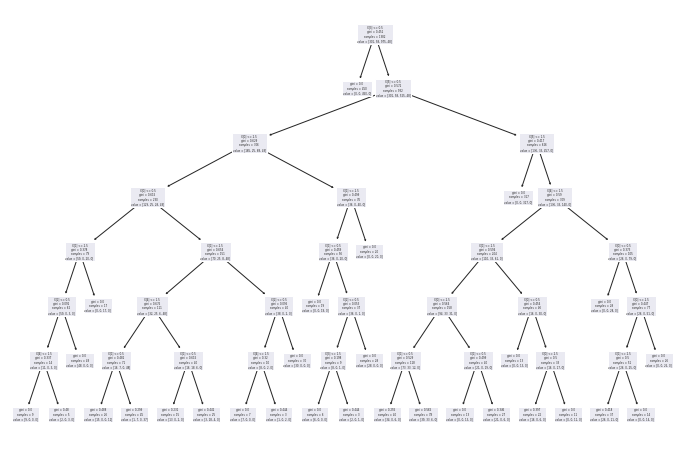

In [221]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(dtree.fit(x_train,y_train))